In [1]:
from src import optimisation as opt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
opt.rotor_area()

48305.12864159666

In [3]:
ref_data = {}

In [4]:
ref_data["wind_speed"] = [0 + 0.01 * n for n in range(3100)]
ref_data["power_curve"] = []
ref_data["weibull"] = []

In [5]:
for v in ref_data["wind_speed"]:
    ref_data["power_curve"].append(opt.ref_power_curve(v=v))
    ref_data["weibull"].append(
        opt.weibull_probability_distribution(v=v, k=2, c=10.9)
    )

In [6]:
ref_data = pd.DataFrame(ref_data)

In [7]:
ref_data.head()

,wind_speed,power_curve,weibull
0,0.00,0.0,0.000000
1,0.01,0.0,0.000168
2,0.02,0.0,0.000337
3,0.03,0.0,0.000505
4,0.04,0.0,0.000673


In [13]:
# opt.annual_energy_production(n_turbines=25, k=2, c=10.9)

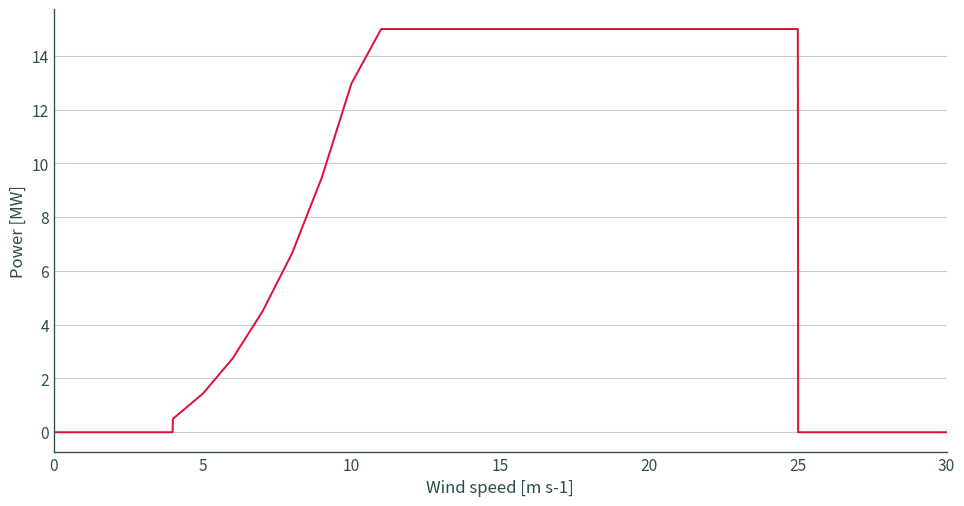

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
sns.lineplot(
    data=ref_data, x="wind_speed", y="power_curve", legend=False,
    color="crimson"
)
axes.grid(axis="y")
axes.set_xlim(0, 30)
sns.despine()
axes.set_xlabel("Wind speed [m s-1]")
axes.set_ylabel("Power [MW]")
plt.show()

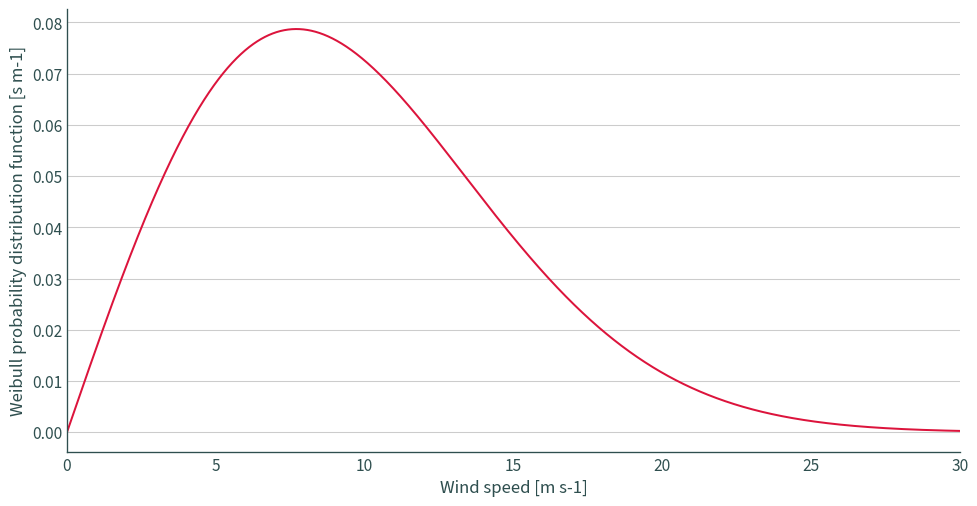

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
sns.lineplot(
    data=ref_data, x="wind_speed", y="weibull", legend=False,
    color="crimson"
)
axes.grid(axis="y")
axes.set_xlim(0, 30)
sns.despine()
axes.set_xlabel("Wind speed [m s-1]")
axes.set_ylabel("Weibull probability distribution function [s m-1]")
plt.show()